In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

Lectura del archivo generado en transform.ipynb

In [19]:
df = pd.read_csv('../../data/telecom_pca.csv')
x = df.drop(columns=['TARGET', 'Unnamed: 0'])
columns = x.columns
y = df['TARGET']

scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
x = pd.DataFrame(x, columns= columns)

Definición de las X e Y tanto de train como de test, teniendo al test como el 30% de los datos del dataset obtenido del csv. Seguido de ello, se hace uso del MLPClassifier, que genera una red neuronal con las siguientes iteraciones:
-3 capas ocultas de 80, 60 y 15 nodos
-500 iteraciones máximas (épocas)
-función de activación empleada: ReLu
-algoritmo solucionador: adam

Seguido de ello, se ace un fit de x e y del test

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25, random_state= 1)


In [21]:
clf = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=80, activation = 'relu', solver = 'adam', random_state=1, learning_rate_init= 0.001)


In [22]:
kfold = KFold(n_splits = 5, random_state=42, shuffle=True)
cv_results = cross_val_score(clf, x,y, cv = kfold, scoring='accuracy', verbose = 10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ................................ score: (test=1.000) total time= 3.4min
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.4min remaining:    0.0s


[CV] END ................................ score: (test=1.000) total time= 3.5min
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  6.9min remaining:    0.0s


[CV] END ................................ score: (test=1.000) total time= 4.6min
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 11.5min remaining:    0.0s


[CV] END ................................ score: (test=1.000) total time= 3.8min
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 15.3min remaining:    0.0s


[CV] END ................................ score: (test=1.000) total time= 3.6min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 18.9min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 18.9min finished


In [23]:
print(cv_results.mean(), cv_results.std())

0.9999982465445969 3.506910806105878e-06


In [24]:
clf.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=80, random_state=1)

Se obtiene la matriz de salida de predicción, llamado también como target

In [25]:
y_pred = clf.predict(x_test)

Se calcula el porcentaje de confianza del modelo, basando en el cálculo interno de la matriz de confusión empleando como el x_test e y_test

In [26]:
clf.score(x_test, y_test)

1.0

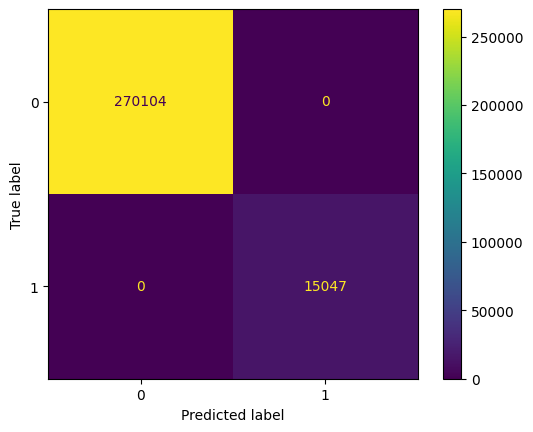

In [28]:
cm = confusion_matrix(y_test, y_pred)
cm_plot = ConfusionMatrixDisplay(cm).plot()

In [29]:
a,b,c,d = cm.ravel()
(a,b,c,d)

(270104, 0, 0, 15047)

In [30]:
percentage_A = a / (a + b) #True positives = True positives / (True positives + false positives)
percentage_D = d / (d + c) #True positives = True negatives / (True negatives + false negatives)
print("Precission in true positives (A):",percentage_A," Precission in true negatives (D):",percentage_D)

Precission in true positives (A): 1.0  Precission in true negatives (D): 1.0


In [31]:
#function to get all clients churn probability: 0 means no churn, 1 means churn
def getChurnProbabilities(clf, x):
    return clf.predict_proba(x)

In [32]:
proba_matrix = getChurnProbabilities(clf, x)

In [33]:
#function to set each client according to low, mid or high churn chance (given low and high percentages by the user)
def showProbabilities(low,mid,high):
    clients_permanent = []
    clients_low = []
    clients_mid = []
    clients_high = []
    i = 0
    #for each client in the data set
    for client in proba_matrix:
        #get all their data and their churn chance into one list
        client_index = x.index[i]
        client_info = x.loc[client_index].values
        client_info = np.append(client_info,client[1])
        #store client data into profiles(permanent, low, mid, high) list
        if client[1] < low:
            clients_permanent.append(client_info)
        elif client[1] < mid:
            clients_low.append(client_info)
        elif client[1] < high:
            clients_mid.append(client_info)
        else:
            clients_high.append(client_info)
        i += 1
    return clients_permanent, clients_low, clients_mid, clients_high


In [34]:
clients_permanent, clients_low, clients_mid, clients_high = showProbabilities(.30,.60,.80)

print(len(clients_permanent), " clients have no churn chances")
print(len(clients_low), " clients have low churn chances")
print(len(clients_mid), " clients have mid churn chances")
print(len(clients_high), " clients have high churn chances")

1080399  clients have no churn chances
0  clients have low churn chances
0  clients have mid churn chances
60205  clients have high churn chances


In [35]:
mse_test = mean_squared_error(y_test, y_pred)
mse_test

0.0

In [36]:
mae_test = mean_absolute_error(y_test,y_pred)
mae_test

0.0

In [37]:
y_pred_train = clf.predict(x_train)

In [38]:
mse_train = mean_squared_error(y_train,y_pred_train)
mse_train

0.0

In [39]:
mae__train = mean_absolute_error(y_train, y_pred_train)
mae__train

0.0